https://camelyon16.grand-challenge.org/Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings; warnings.filterwarnings('ignore')
from fastai.vision import *
sys.path.append("dev/")

In [3]:
path = Path('../data/histopathologic/'); path.ls()

[PosixPath('../data/histopathologic/train'),
 PosixPath('../data/histopathologic/patch_id_wsi.csv'),
 PosixPath('../data/histopathologic/sample_submission.csv'),
 PosixPath('../data/histopathologic/preds'),
 PosixPath('../data/histopathologic/submissions'),
 PosixPath('../data/histopathologic/train_labels.csv'),
 PosixPath('../data/histopathologic/logs'),
 PosixPath('../data/histopathologic/models'),
 PosixPath('../data/histopathologic/ensemble'),
 PosixPath('../data/histopathologic/test')]

In [4]:
len((path/'train').ls()), len((path/'test').ls())

(220025, 57458)

### cv data

In [5]:
from transform_utils import center_crop, center_crop_and_resize

In [6]:
cv_data = pd.read_pickle(path/'models/cv_data.pkl')

### trained models

In [7]:
[o for o in (path/'models').ls() if 'best_of' in o.stem]

[PosixPath('../data/histopathologic/models/best_of_inceptionresnetv2'),
 PosixPath('../data/histopathologic/models/best_of_resnet101'),
 PosixPath('../data/histopathologic/models/best_of_densenet169'),
 PosixPath('../data/histopathologic/models/best_of_densenet201'),
 PosixPath('../data/histopathologic/models/best_of_inceptionv4'),
 PosixPath('../data/histopathologic/models/best_of_squeezenet1_1'),
 PosixPath('../data/histopathologic/models/best_of_resnet152'),
 PosixPath('../data/histopathologic/models/best_of_vgg16_bn')]

### logs

In [13]:
pd.read_csv(path/'logs/resnet101.csv')

,epoch,train_loss,valid_loss,accuracy,auc,time
0,0,3.738137,NaN,NaN,NaN,NaN
1,epoch,train_loss,valid_loss,accuracy,auc,time
2,0,0.200944,0.172049,0.935757,0.975940,NaN
3,1,0.161895,0.140873,0.949074,0.983996,NaN
4,2,0.148372,0.129399,0.952778,0.986590,NaN
5,3,0.141929,0.124138,0.955755,0.987830,NaN
6,4,0.132865,0.122840,0.956482,0.988774,NaN
7,5,0.145071,0.140544,0.948324,0.987413,NaN
8,6,0.141652,0.121487,0.956391,0.989441,NaN
9,7,0.137206,0.131924,0.951551,0.988944,NaN


### read data

In [8]:
from metric_utils import AUC
from fastai.callbacks import *

In [9]:
i = 0
fold_num = i
fold_data = cv_data[i]

### init learn

In [10]:
auc = AUC()
model_name = 'resnet152'
arch = getattr(models, model_name)
model_name = arch.__name__ 
os.makedirs(path/f'models/best_of_{model_name}', exist_ok=True)
learn_callbacks = [TerminateOnNaNCallback()]
learn_callback_fns = [partial(EarlyStoppingCallback, monitor='auc', mode='max', patience=2),
                      partial(SaveModelCallback, monitor='auc', mode='max', every='improvement',
                              name=f'best_of_{model_name}/fold{fold_num}'),
                      partial(CSVLogger, filename=f'logs/{model_name}')]

learn = cnn_learner(data=fold_data, base_arch=arch, metrics=[accuracy, auc], callbacks=learn_callbacks,
                   callback_fns=learn_callback_fns)

### Interpretation

In [39]:
load_fold_num = 0
learn.load(f'best_of_{model_name}/fold{load_fold_num}');
learn.callbacks = [cb for cb in learn.callbacks if cb.__class__ == TerminateOnNaNCallback.__class__]

In [40]:
interp = ClassificationInterpretation.from_learner(learn, ds_type=DatasetType.Valid)

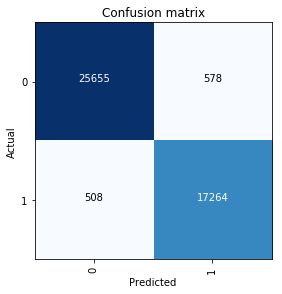

In [41]:
# no TTA
interp.plot_confusion_matrix()

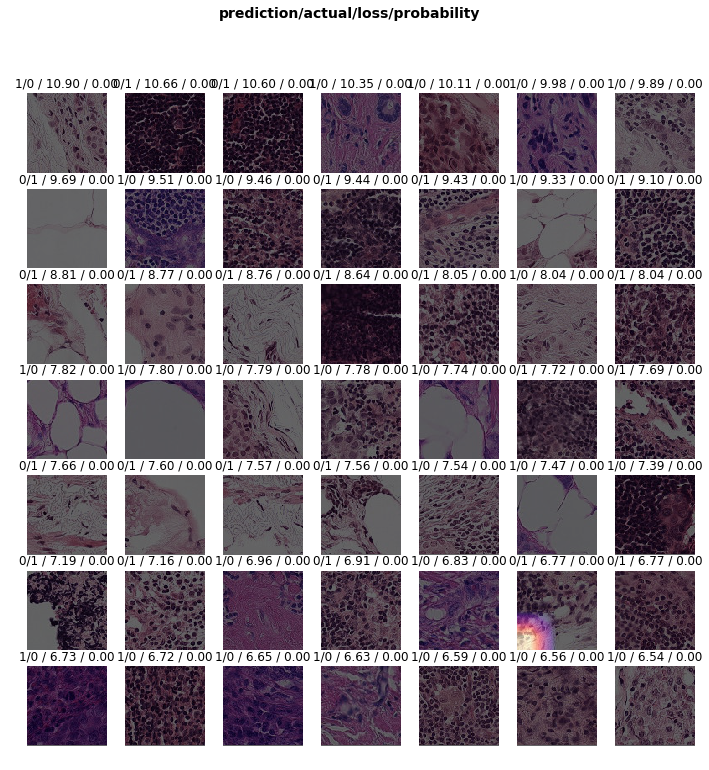

In [42]:
fig = interp.plot_top_losses(49, heatmap=True, heatmap_thresh=0, return_fig=True)

In [25]:
# indices of misclassified samples
is_incorrect = interp.y_true != interp.pred_class; torch.sum(is_incorrect)
# probabilities assigned to argmax 
pred_probs = torch.gather(interp.probs, dim=1, index=interp.pred_class.view(-1,1)).view(-1)
# probabilities of misclassified samples
confused_probs = pred_probs.masked_select(is_incorrect)
# ground truth labels of misclassified samples
confused_y_true = interp.y_true.masked_select(is_incorrect)
# confused label misclassified samples
confused_label = interp.pred_class.masked_select(is_incorrect)

len(confused_y_true), len(confused_probs)

(1399, 1399)

In [26]:
valid_fnames = learn.data.valid_ds.x.items
confused_valid_fn = valid_fnames[to_np(is_incorrect)]
confused_fn = valid_fnames[(to_np(is_incorrect)).astype(bool)]
confused_idxs = np.arange(len(valid_fnames))[(to_np(is_incorrect)).astype(bool)]
len(confused_fn)

1399

In [27]:
# create most confused samples dataframe
confused_samples_df = (pd.DataFrame({'fn':confused_fn,
     'true_label':to_np(confused_y_true),
     'confused_label':to_np(confused_label),
     'confused_probs':to_np(confused_probs),
     'confused_idxs':confused_idxs})
    .sort_values("confused_probs", ascending=False)
    .reset_index(drop=True))

In [28]:
confused_samples_df.head()

,fn,true_label,confused_label,confused_probs,confused_idxs
0,../data/histopathologic/train/817214c604ba5c73...,1,0,0.999919,31177
1,../data/histopathologic/train/3cd178e0139dbed1...,1,0,0.999913,4763
2,../data/histopathologic/train/dc791c6243cb89d9...,1,0,0.999904,40614
3,../data/histopathologic/train/d2429b1f9bae51a7...,1,0,0.999709,36121
4,../data/histopathologic/train/da4885657819ea73...,1,0,0.999590,16256


In [33]:
confused_samples_df.true_label.mean()

0.6025732666190136

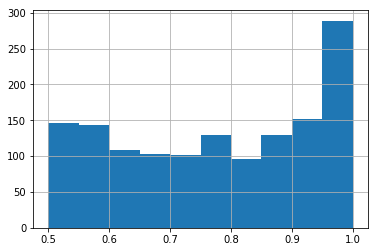

In [30]:
confused_samples_df.confused_probs.hist()

## Get Preds and Subs

In [45]:
# create preds and submissions directory for the model
model_name = 'resnet152'
os.makedirs(path/f'preds/best_of_{model_name}', exist_ok=True)
os.makedirs(path/f"submissions/best_of_{model_name}", exist_ok=True)

In [54]:
auc = AUC()
arch = getattr(models, model_name)
model_name = arch.__name__ 
os.makedirs(path/f'models/best_of_{model_name}', exist_ok=True)
learn_callbacks = [TerminateOnNaNCallback()]
learn_callback_fns = [partial(EarlyStoppingCallback, monitor='auc', mode='max', patience=2),
                      partial(SaveModelCallback, monitor='auc', mode='max', every='improvement',
                              name=f'best_of_{model_name}/fold{fold_num}'),
                      partial(CSVLogger, filename=f'logs/{model_name}')]

learn = cnn_learner(data=fold_data, base_arch=arch, metrics=[accuracy, auc], callbacks=learn_callbacks,
                   callback_fns=learn_callback_fns)

In [55]:
n_folds = len((path/f'models/best_of_{model_name}').ls())

In [56]:
learn.callback_fns

[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True),
 functools.partial(<class 'fastai.callbacks.tracker.EarlyStoppingCallback'>, monitor='auc', mode='max', patience=2),
 functools.partial(<class 'fastai.callbacks.tracker.SaveModelCallback'>, monitor='auc', mode='max', every='improvement', name='best_of_resnet152/fold0'),
 functools.partial(<class 'fastai.callbacks.csv_logger.CSVLogger'>, filename='logs/resnet152')]

In [57]:
learn.callbacks

[TerminateOnNaNCallback]

### get preds

In [58]:
for i in range(n_folds):
    # disable TerminateOnNaNCallback for get_preds to work
    learn.callbacks = []

    # load fold model
    load_fold_num = i
    learn.load(f'best_of_{model_name}/fold{load_fold_num}');

    # get preds
    test_preds, _ = learn.get_preds(ds_type=DatasetType.Test)

    # save preds as pickle file
    pd.to_pickle(test_preds, path/f'preds/best_of_{model_name}/fold{load_fold_num}_preds.pkl')
    

### get_preds with TTA

In [59]:
for i in range(n_folds):
    # disable TerminateOnNaNCallback for get_preds to work
    learn.callbacks = []

    # load fold model
    load_fold_num = i
    learn.load(f'best_of_{model_name}/fold{load_fold_num}');

    # get preds
    tta_preds,_  = learn.TTA(ds_type=DatasetType.Test)

    # save preds as pickle file
    pd.to_pickle(tta_preds, path/f'preds/best_of_{model_name}/fold{load_fold_num}_TTA_preds.pkl')
    

### read logs

In [9]:
pd.options.display.max_rows = 1000

In [10]:
(path/'logs').ls()

[PosixPath('../data/histopathologic/logs/tranining.logs'),
 PosixPath('../data/histopathologic/logs/densenet201.csv'),
 PosixPath('../data/histopathologic/logs/resnet152.csv'),
 PosixPath('../data/histopathologic/logs/resnet101.csv'),
 PosixPath('../data/histopathologic/logs/vgg16_bn.csv'),
 PosixPath('../data/histopathologic/logs/densenet169.csv')]

In [15]:
def plot_logs(model_name='densenet201', size=(20,10)):
    log_df = pd.read_csv(path/f'logs/{model_name}.csv')    
    metrics = [] 
    for o in log_df['auc']:
        if isinstance(o, float) and (not np.isnan(o)):
            metrics.append(o)
        elif isinstance(o, str) and (o != 'auc'):
            metrics.append(float(o))
    metrics = [np.round(o,4) for o in metrics]
    fig,ax = plt.subplots(1,1, figsize=size)
    ax.set_title(model_name, {'fontsize':size[0]})
    ax.plot(metrics)
    ax.scatter(np.argmax(metrics), max(metrics), c='red')
    ax.hlines(max(metrics), xmin=0, xmax=len(metrics), colors='red', linestyles = 'dashed')
    plt.yticks(list(plt.yticks()[0]) + [max(metrics)])
    for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(size[0])  
    for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(size[0])  
    return log_df

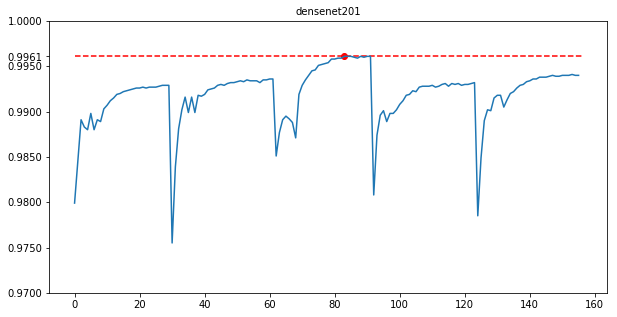

In [16]:
log_df = plot_logs('densenet201', (10,5))

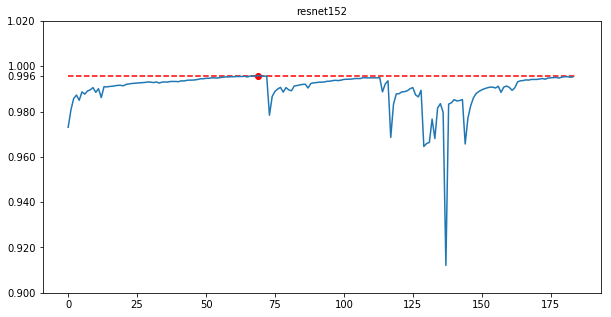

In [23]:
# Only completed 4 folds ??
log_df = plot_logs('resnet152', (10,5))

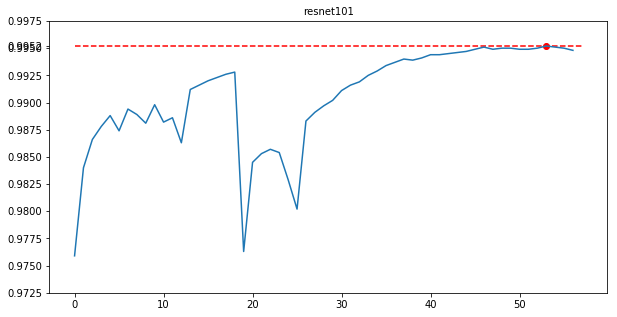

In [18]:
log_df = plot_logs('resnet101', (10,5))

### create submissions

simple average of all folds

In [11]:
sample_submission = pd.read_csv(path/'sample_submission.csv')
test_names = [o.name.split('.')[0] for o in learn.data.test_ds.items]

In [12]:
pred_fnames = (path/f'preds/best_of_{model_name}').ls()

In [13]:
TTA_fnames = [o for o in pred_fnames if "TTA" in str(o)]
non_TTA_fnames = [o for o in pred_fnames if "TTA" not in str(o)]

In [14]:
# average TTA_preds
avg_TTA_labels = np.mean([pd.read_pickle(fn).numpy() for fn in TTA_fnames], axis=0)[:, 1]
avg_non_TTA_labels = np.mean([pd.read_pickle(fn).numpy() for fn in non_TTA_fnames], axis=0)[:, 1]

In [15]:
# create submission file
avg_TTA_submission = sample_submission.copy()
avg_non_TTA_submission = sample_submission.copy()

avg_TTA_submission['label'] = sample_submission['id'].map(dict(zip(test_names, avg_TTA_labels)))
avg_non_TTA_submission['label'] = sample_submission['id'].map(dict(zip(test_names, avg_non_TTA_labels)))

In [16]:
# save submissions
avg_TTA_path = path/f"submissions/best_of_{model_name}/{model_name}_avg_TTA.csv"
avg_non_TTA_path = path/f"submissions/best_of_{model_name}/{model_name}_avg_non_TTA.csv"
avg_TTA_submission.to_csv(avg_TTA_path, index=False)
avg_non_TTA_submission.to_csv(avg_non_TTA_path, index=False)

In [19]:
# Submit to kaggle
cmd = "kaggle competitions submit -c histopathologic-cancer-detection -f {} -m {}_avg_TTA".format(avg_TTA_path, model_name)
os.system(cmd);print(cmd);
cmd = "kaggle competitions submit -c histopathologic-cancer-detection -f {} -m {}_avg_TTA".format(avg_non_TTA_path, model_name)
os.system(cmd);print(cmd)

kaggle competitions submit -c histopathologic-cancer-detection -f ../data/histopathologic/submissions/best_of_resnet152/resnet152_avg_TTA.csv -m resnet152_avg_TTA
kaggle competitions submit -c histopathologic-cancer-detection -f ../data/histopathologic/submissions/best_of_resnet152/resnet152_avg_non_TTA.csv -m resnet152_avg_TTA


In [43]:
cmd

'kaggle competitions submit -c histopathologic-cancer-detection -f ../data/histopathologic/submissions/best_of_densenet201/densenet201_avg_non_TTA.csv -m densenet201_avg_TTA'